# Using Pandas to Get Familiar With Your Data
The first step in any machine learning project is familiarize yourself with the data. You'll use the Pandas library for this. Pandas is the primary tool data scientists use for exploring and manipulating data. Most people abbreviate pandas in their code as pd. We do this with the command

In [1]:
import pandas as pd

import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

The most important part of the Pandas library is the DataFrame. A DataFrame holds the type of data you might think of as a table. This is similar to a sheet in Excel, or a table in a SQL database.

Pandas has powerful methods for most things you'll want to do with this type of data.

As an example, we'll look at data about home prices in Melbourne, Australia. In the hands-on exercises, you will apply the same processes to a new dataset, which has home prices in Iowa.

The example (Melbourne) data is at the file path *melb_data.csv*.

We load and explore the data with the following commands:

In [2]:
# save filepath to variable for easier access
melbourne_file_path = 'melb_data.csv'

# read the data and store data in DataFrame titled melbourne_data
melbourne_data = pd.read_csv(melbourne_file_path) 

# print a summary of the data in Melbourne data
melbourne_data.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


## Interpreting Data Description

The results show 8 numbers for each column in your original dataset. The first number, the `count`, shows how many rows have non-missing values.

Missing values arise for many reasons. For example, the size of the 2nd bedroom wouldn't be collected when surveying a 1 bedroom house. We'll come back to the topic of missing data.

The second value is the `mean`, which is the average. Under that, `std` is the standard deviation, which measures how numerically spread out the values are.

To interpret the `min`, 25%, 50%, 75% and `max` values, imagine sorting each column from lowest to highest value. The first (smallest) value is the `min`. If you go a quarter way through the list, you'll find a number that is bigger than 25% of the values and smaller than 75% of the values. That is the 25% value (pronounced "25th percentile"). The 50th and 75th percentiles are defined analogously, and the `max` is the largest number.

In [3]:
print('The minimum amount of bedrooms is: {}'.format(melbourne_data['Rooms'].min()))
print('The average amount of bedrooms is: {} $\pm$ {}'.format(int(melbourne_data['Rooms'].mean()), round(melbourne_data['Rooms'].std())))
print('The maximum amount of bedrooms is: {}'.format(melbourne_data['Rooms'].max()))

The minimum amount of bedrooms is: 1
The average amount of bedrooms is: 2 $\pm$ 1
The maximum amount of bedrooms is: 10


## Selecting Data for Modeling

Your dataset had too many variables to wrap your head around, or even to print out nicely. How can you pare down this overwhelming amount of data to something you can understand?

We'll start by picking a few variables using our intuition. Later courses will show you statistical techniques to automatically prioritize variables.

To choose variables/columns, we'll need to see a list of all columns in the dataset. That is done with the `columns` property of the DataFrame (the bottom line of code below).

In [4]:
melbourne_data.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [5]:
# The Melbourne data has some missing values (some houses for which some variables weren't recorded.)
# So we will take the simplest option for now, and drop houses from our data. 

# dropna drops missing values (think of na as "not available")
melbourne_data = melbourne_data.dropna(axis=0)

There are many ways to select a subset of your data.

* Dot notation, which we use to select the "prediction target"
* Selecting with a column list, which we use to select the "features"

### Selecting The Prediction Target

You can pull out a variable with dot-notation. This single column is stored in a `Series`, which is broadly like a DataFrame with only a single column of data.

We'll use the dot notation to select the column we want to predict, which is called the `prediction target`. By convention, the prediction target is called y. So the code we need to save the house prices in the Melbourne data is

In [6]:
y = melbourne_data.Price

## Choosing "Features"

The columns that are inputted into our model (and later used to make predictions) are called "features." In our case, those would be the columns used to determine the home price. Sometimes, you will use all columns except the target as features. Other times you'll be better off with fewer features.

For now, we'll build a model with only a few features. Later on you'll see how to iterate and compare models built with different features.

We select multiple features by providing a list of column names inside brackets. Each item in that list should be a string (with quotes).

Here is an example:

In [7]:
melbourne_features = ['Rooms', 'Bathroom', 'Landsize', 'Lattitude', 'Longtitude']

By convention, this data is called **X**.

In [8]:
X = melbourne_data[melbourne_features]

X.describe()

,Rooms,Bathroom,Landsize,Lattitude,Longtitude
count,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000
mean,2.931407,1.576340,471.006940,-37.807904,144.990201
std,0.971079,0.711362,897.449881,0.075850,0.099165
min,1.000000,1.000000,0.000000,-38.164920,144.542370
25%,2.000000,1.000000,152.000000,-37.855438,144.926198
50%,3.000000,1.000000,373.000000,-37.802250,144.995800
75%,4.000000,2.000000,628.000000,-37.758200,145.052700
max,8.000000,8.000000,37000.000000,-37.457090,145.526350


In [9]:
display(X)

,Rooms,Bathroom,Landsize,Lattitude,Longtitude
1,2,1.0,156.0,-37.80790,144.99340
2,3,2.0,134.0,-37.80930,144.99440
4,4,1.0,120.0,-37.80720,144.99410
6,3,2.0,245.0,-37.80240,144.99930
7,2,1.0,256.0,-37.80600,144.99540
...,...,...,...,...,...
12205,3,2.0,972.0,-37.51232,145.13282
12206,3,1.0,179.0,-37.86558,144.90474
12207,1,1.0,0.0,-37.85588,144.89936
12209,2,1.0,0.0,-37.85581,144.99025



## Building Your Model

You will use the **scikit-learn** library to create your models. When coding, this library is written as **sklearn**, as you will see in the sample code. Scikit-learn is easily the most popular library for modeling the types of data typically stored in DataFrames.

The steps to building and using a model are:

**Define**: What type of model will it be? A decision tree? Some other type of model? Some other parameters of the model type are specified too.

**Fit**: Capture patterns from provided data. This is the heart of modeling.

**Predict**: Just what it sounds like

**Evaluate**: Determine how accurate the model's predictions are.

Here is an example of defining a decision tree model with scikit-learn and fitting it with the features and target variable.

In [10]:
from sklearn.tree import DecisionTreeRegressor

# Define model. Specify a number for random_state to ensure same results each run
melbourne_model = DecisionTreeRegressor(random_state=1)

#Fit the model
melbourne_model.fit(X,y)

DecisionTreeRegressor(random_state=1)

Many machine learning models allow some randomness in model training. Specifying a number for random_state ensures you get the same results in each run. This is considered a good practice. You use any number, and model quality won't depend meaningfully on exactly what value you choose.

We now have a fitted model that we can use to make predictions.

In practice, you'll want to make predictions for new houses coming on the market rather than the houses we already have prices for. But we'll make predictions for the first few rows of the training data to see how the predict function works.

Making prediction for the following 5 houses:

   Rooms  Bathroom  Landsize  Lattitude  Longtitude
1      2       1.0     156.0   -37.8079    144.9934
2      3       2.0     134.0   -37.8093    144.9944
4      4       1.0     120.0   -37.8072    144.9941
6      3       2.0     245.0   -37.8024    144.9993
7      2       1.0     256.0   -37.8060    144.9954

The predictions are:[1035000. 1465000. 1600000. 1876000. 1636000.]
Making prediction for the following 5 houses:

       Rooms  Bathroom  Landsize  Lattitude  Longtitude
12205      3       2.0     972.0  -37.51232   145.13282
12206      3       1.0     179.0  -37.86558   144.90474
12207      1       1.0       0.0  -37.85588   144.89936
12209      2       1.0       0.0  -37.85581   144.99025
12212      6       3.0    1087.0  -37.81038   144.89389

The predictions are:[ 601000. 1050000.  385000.  560000. 2450000.]


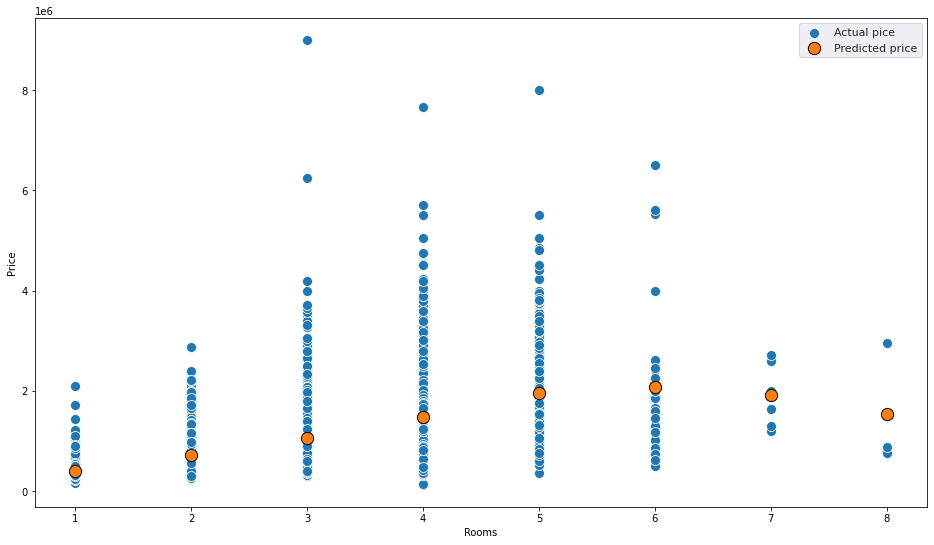

In [11]:
print("Making prediction for the following 5 houses:\n")
print(X.head())
print("\nThe predictions are:{}".format(melbourne_model.predict(X.head())))

print("Making prediction for the following 5 houses:\n")
print(X.tail())
print("\nThe predictions are:{}".format(melbourne_model.predict(X.tail())))

price = np.zeros((2,X.Rooms.max()))
for i in range(1, X.Rooms.max()+1):
    price[0,i-1] = i
    price[1,i-1] = np.mean(melbourne_model.predict(X[X.Rooms == i]))
    #print("The predictions for the average {} Bedrooms price is: {:.1f}".format(i, np.mean(melbourne_model.predict(X[X.Rooms == i]))))


price = pd.DataFrame(price.T, columns=["Rooms", "Price"])


fig, ax = plt.subplots(figsize=(16,9))
plt.rcParams.update({'font.size': 24})

ax = sns.set_theme(style="darkgrid")

ax = sns.scatterplot(data=melbourne_data, x="Rooms", y="Price", label="Actual pice", s=100)
ax = sns.scatterplot(data=price, x="Rooms", y="Price", ec='black', label="Predicted price", s=150)
#sns.lineplot(data=price, x="Rooms", y="Price", label="Predicted price", col="red", linewidth=2)

## Model validation

In most (though not all) applications, the relevant measure of model quality is predictive accuracy. In other words, will the model's predictions be close to what actually happens.

Many people make a huge mistake when measuring predictive accuracy. They make predictions with their *training data* and compare those predictions to the target values in the training data. The problem with this approach and how to solve it will be presented, but let's think about how we'd do this first.

First summarize the model quality into an understandable way is needed. If a comparison with predicted and actual home values for 10,000 houses, it's likely find mix of good and bad predictions. Looking through a list of 10,000 predicted and actual values would be pointless. We need to summarize this into a single metric.

There are many metrics for summarizing model quality, but we'll start with one called `Mean Absolute Error` (also called **MAE**). Let's break down this metric starting with the last word, error

The prediction error for each house is:

``error=actual−predicted``

So, if a house cost $150,000 and you predicted it would cost $100,000 the error is $50,000.

With the MAE metric, we take the absolute value of each error. This converts each error to a positive number. We then take the average of those absolute errors. This is our measure of model quality. In plain English, it can be said as

In [12]:
from sklearn.metrics import mean_absolute_error

predicted_home_prices = melbourne_model.predict(X)
mean_absolute_error(y, predicted_home_prices)

1115.7467183128902

## The Problem with "In-Sample" Scores

The measure computed before can be called an "in-sample" score. A single "sample" of houses for both building the model and evaluating it was used. Here's why this is bad.

Imagine that, in the large real estate market, door color is unrelated to home price.

However, in the sample of data you used to build the model, all homes with green doors were very expensive. The model's job is to find patterns that predict home prices, so it will see this pattern, and it will always predict high prices for homes with green doors.

Since this pattern was derived from the training data, the model will appear accurate in the training data.

But if this pattern doesn't hold when the model sees new data, the model would be very inaccurate when used in practice.

Since models' practical value come from making predictions on new data, we measure performance on data that wasn't used to build the model. The most straightforward way to do this is to exclude some data from the model-building process, and then use those to test the model's accuracy on data it hasn't seen before. This data is called **validation data**.

The scikit-learn library has a function `train_test_split` to break up the data into two pieces. We'll use some of that data as training data to fit the model, and we'll use the other data as validation data to calculate mean_absolute_error.



In [13]:
from sklearn.model_selection import train_test_split

# split data into training and validation data, for both features and target
# The split is based on a random number generator. Supplying a numeric value to
# the random_state argument guarantees we get the same split every time we
# run this script.

train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)

# Define model
melbourne_model = DecisionTreeRegressor()

# Fit model
melbourne_model.fit(train_X, train_y)

# get predicted prices on validation data
val_predictions = melbourne_model.predict(val_X)
print(mean_absolute_error(val_y, val_predictions))

275197.50441144826


## Underfitting and Overfitting

There are a few alternatives for controlling the tree depth, and many allow for some routes through the tree to have greater depth than other routes. But the `max_leaf_nodes` argument provides a very sensible way to control overfitting vs underfitting. The more leaves we allow the model to make, the more we move from the underfitting area in the above graph to the overfitting area.

We can use a utility function to help compare MAE scores from different values for `max_leaf_nodes`:

In [14]:
def get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(train_X, train_y)
    preds_val = model.predict(val_X)
    mae = mean_absolute_error(val_y, preds_val)
    return(mae)

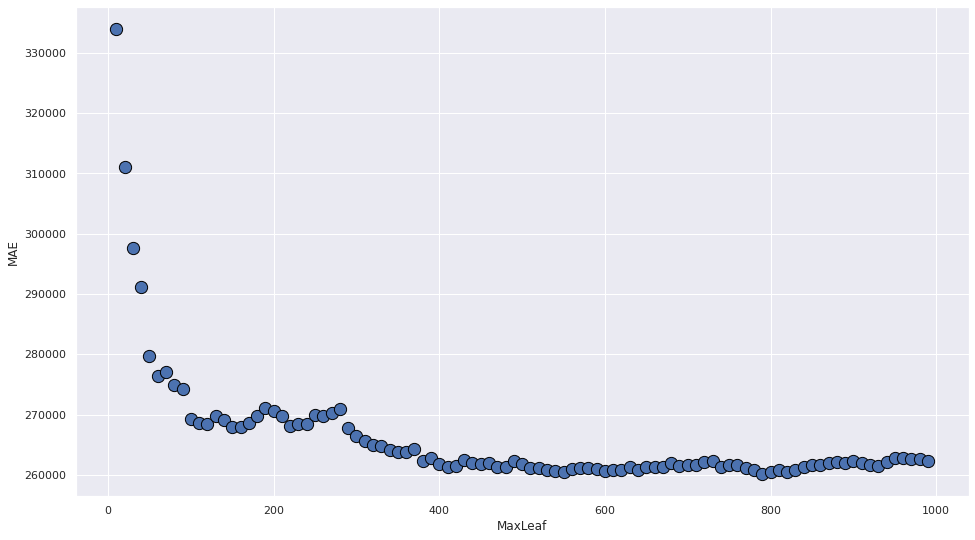

In [15]:
# split data into training and validation data, for both features and target
train_X, val_X, train_y, val_y = train_test_split(X, y,random_state = 0)

# compare MAE with differing values of max_leaf_nodes
leaf_MAE = []
for max_leaf_nodes in range(10, 1000, 10):
    my_mae = get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y)
    leaf_MAE.append([max_leaf_nodes, my_mae])
    #print("Max leaf nodes: %d  \t\t Mean Absolute Error:  %d" %(max_leaf_nodes, my_mae))

leaf_MAE = pd.DataFrame(leaf_MAE, columns=['MaxLeaf', 'MAE'])

fig, axs = plt.subplots(figsize=(16,9))
ax = sns.scatterplot(data=leaf_MAE, x="MaxLeaf", y='MAE', s=150, ec='black')

## Random Forest

Decision trees leave you with a difficult decision. A deep tree with lots of leaves will overfit because each prediction is coming from historical data from only the few houses at its leaf. But a shallow tree with few leaves will perform poorly because it fails to capture as many distinctions in the raw data.

Even today's most sophisticated modeling techniques face this tension between underfitting and overfitting. But, many models have clever ideas that can lead to better performance. We'll look at the random forest as an example.

The random forest uses many trees, and it makes a prediction by averaging the predictions of each component tree. It generally has much better predictive accuracy than a single decision tree and it works well with default parameters. If you keep modeling, you can learn more models with even better performance, but many of those are sensitive to getting the right parameters.

We build a random forest model similarly to how we built a decision tree in scikit-learn - this time using the `RandomForestRegressor` class instead of `DecisionTreeRegressor`.

In [16]:
from sklearn.ensemble import RandomForestRegressor

forest_model = RandomForestRegressor(random_state=1)
forest_model.fit(train_X, train_y)
melb_preds = forest_model.predict(val_X)
print(mean_absolute_error(val_y, melb_preds))

207190.6873773146
